<center>Минимстерство образования Республики Беларусь</center>

<center>Учреждение образования</center>

<center><<Брестский государственный технический университет>></center>

<center>Кафедра ИИТ</center>

<br /><br /><br /><br /><br /><br />

<center>Лабораторная работа №3</center>

<center>за 3 семестр</center>

<center>по дисциплине: "Методы и алгоритмы принятия решений"</center>

<center>Тема: "Нелинейные ИНС в задачах прогнозирования"</center>

<br /><br /><br /><br /><br /><br />

<div style="display: table; width: 100%;">
    <div style="float: right; width: 33%;">
        <p>Выполнил:</p>
        <p>студент 2 курса</p>
        <p>факультета ЭИС</p>
        <p>группы ПО-4(1)</p>
        <p>Галанин П. И.</p>
        <br />
        <p>Проверил:</p>
        <p>ст. преподаватель</p>
        <p>Крощенко А. А.</p>
    </div>
</div>

<br /><br /><br /><br /><br /><br />

<center>Брест 2020</center>

# Лабораторная работа №3

**Тема**: "Нелинейные ИНС в задачах прогнозирования".

**Цель работы**: "Изучить обучение и функционирование нелинейной ИНС при решении задач прогнозирования".

**Задание**:

1. Написать на любом ЯВУ программу моделирования прогнозирующей нелинейной ИНС. Для тестирования использовать функцию

Варианты заданий приведены в следующей таблице:

|№ варианта|a  |b  |с   |d  |Кол-во входов ИНС|Кол-во НЭ в скрытом слое|
|:--------:|:-:|:-:|:--:|:-:|:---------------:|:----------------------:|
|1         |0.1|0.1|0.05|0.1|6                |2                       |
|2         |0.2|0.2|0.06|0.2|8                |3                       |
|3         |0.3|0.3|0.07|0.3|10               |4                       |
|4         |0.4|0.4|0.08|0.4|6                |2                       |
|5         |0.1|0.5|0.09|0.5|8                |3                       |
|6         |0.2|0.6|0.05|0.6|10               |4                       |
|7         |0.3|0.1|0.06|0.1|6                |2                       |
|8         |0.4|0.2|0.07|0.2|8                |3                       |
|9         |0.1|0.3|0.08|0.3|10               |4                       |
|10        |0.2|0.4|0.09|0.4|6                |2                       |
|11        |0.3|0.5|0.05|0.5|8                |3                       |

Для прогнозирования использовать многослойную ИНС с одним скрытым слоем. В качестве функций активации для скрытого слоя использовать сигмоидную функцию, для выходного - линейную.

2. Результаты представить в виде отчета содержащего:
    1. Титульный лист
    2. Цель работы
    3. Задание
    4. График прогнозируемой функции на участке обучения
    5. Результаты обучения:
        - таблицу со столбцами:
            - эталонное значение
            - полученное значение
            - отклонение
        - график изменения ошибки в зависимости от итерации
    6. Результаты прогнозирования:
        - таблицу со столбцами:
            - эталонное значение
            - полученное значение
            - отклонение
    7. Выводы по лабораторной работе.
    
Результаты для пунктов 3 и 4 приводятся для значения $\alpha$, при котором достигается минимальная ошибка. В выводах анализируются все полученные результаты.

**Ход работы**:

Разработанная схема:

![](Scheme.png)

Использованные формулы:

Взвешенная сумма для скрытого слоя:

$S_i = e * w_{ki} - T_i$

Функция активации для скрытого слоя:

$y_i = sigm(S_i)$

Взвешенная сумма для выходного слоя:

$s_j = y_i * w_{ki} - T_j$

Функция активации для выходного слоя:

$y_j = linear(S_j)$

Ошибка нейронного элемента j-ого слоя:

$\gamma_j = y_j - e$

Ошибка нейронного элемента i-ого слоя:

$\gamma_i = \sum \gamma_j * F'(S_j) * w_{ij}$

Веса от скрытого слоя к выходному слою:

$\omega_{ij} = \omega_{ij} - \alpha * \gamma_j * F'(S_j) * y_i$

Пороги выходного слоя:

$T_j = T_j + \alpha * F'(S_j)$

Веса от входного слоя к скрытому слою:

$\omega_{ki} = \omega{ki} - \alpha * \gamma_i * F'(S_i) * y_i$

Пороги скрытого слоя:

$T_i = T_i + \alpha * \gamma_i * F(S_i)$

Средняя квадратичная ошибка сети:

$E = {1 \over 2} \sum(y_j - e)^2$

In [1]:
import numpy
from math import sin
from math import cos
import random
import matplotlib.pyplot

# Функция принимает параметры:
# m1 - number neurons for learning
# m2 - number neurons for test
# a - parametr for etalon function
# b - parametr for etalon function
# c - parametr for etalon function
# d - parametr for etalon function
# step - parametr for etalon function
# inputs - number neurons
# hiddens - number neurons
# outputs - number neurons
# Ee - desired squared error
# alpha - learning rate
def lab(m1, m2, a, b, c, d, step, inputs, hiddens, outputs, Ee, alpha):
    # Функция возвращает массив с эталонными значениями
    def get_etalons(n):
        etalons = numpy.zeros(n)
        for i in range(len(etalons)):
            x = step * i
            y = a * cos(b * x) + c * sin(d * x)
            etalons[i] = y
        return etalons

    etalons = get_etalons(m1 + m2)
    #print(etalons)

    # Функция возвращает массив с весами
    # Например, 8 нейронов в входном слое и 3 в скрытом, тогда возвратит массив 8х3
    # Например, 3 нейрона в скрытом слое и 1 нейрон в выходном слое, тогда возвратит массив 3х1
    def get_weights(leftNumberNeurons, rightNumberNeurons, leftRandomBorder, rightRandomBorder):
        weights = numpy.zeros((leftNumberNeurons, rightNumberNeurons))
        for i in range(leftNumberNeurons):
            for j in range(rightNumberNeurons):
                weights[i][j] = random.uniform(leftRandomBorder, rightRandomBorder)
        return weights

    weights_ki = get_weights(inputs, hiddens, -1, 1)
    #print(weights_ki)

    weights_ij = get_weights(hiddens, outputs, -1, 1)
    #print(weights_ij)

    # Функция возвращает массив с порогами
    # Например, 8 нейронов в входном слое и 3 в скрытом, тогда возвратит массив размером 3
    # Например, 3 нейрона в скрытом слое и 1 нейрон в выходном слое, тогда возвратит массив размером 1
    def get_thresholds(numberNeurons, leftRandomBorder, rightRandomBorder):
        tresholds = numpy.zeros(numberNeurons)
        for i in range(numberNeurons):
            tresholds[i] = random.uniform(leftRandomBorder, rightRandomBorder)
        return tresholds

    tresholds_i = get_thresholds(hiddens, -1, 1)
    #print(tresholds_i)

    tresholds_j = get_thresholds(outputs, -1, 1)
    #print(tresholds_j)

    valuesXforGraph = []
    valuesYforGraph = []
    eras = 0
    while 1:
        for q in range(m1 - inputs):
            # Si = x * wki - Ti
            x = etalons[q:(q+inputs)]
            S_i = x.dot(weights_ki) - tresholds_i
            #print(S_i)
            # yi = Sigm(Si)
            y_i = numpy.zeros(len(S_i))
            for i in range(len(S_i)):
                y_i[i] = 1. / (1. + numpy.exp( - S_i[i] )) # sigmoid func
            #print(y_i)
            # Sj = yi * wij - Tj
            S_j = y_i.dot(weights_ij) - tresholds_j
            #print(S_j)
            # yj = Linear(Sj) = Sj
            y_j = S_j
            #print(y_j)
            # jj = yj - e
            j_j = numpy.array([ y_j[i] - etalons[q + inputs + i] for i in range(len(y_j)) ])
            #print(j_j)
            # ji = sum [dF(Sj) * wij]
            dF_j = 1
            j_i = numpy.zeros(hiddens)
            for i in range(hiddens):
                for j in range(outputs):
                    j_i[i] += j_j[j] * dF_j * weights_ij[i][j]
            #print(j_i)
            # wij = wij - alpha * jj * dFj * yi
            for i in range(hiddens):
                for j in range(outputs):
                    weights_ij[i][j] -= alpha * j_j[j] * dF_j * y_j[j]
            #print(weights_ij)
            # Tj = Tj + alpha * jj * dFj
            for j in range(outputs):
                tresholds_j += alpha * j_j[j] * dF_j
            #print(tresholds_j)
            # wki = wki - alpha * ji * dFi * yi
            for k in range(inputs):
                for i in range(hiddens):
                    dFi = y_i[i] * (1 - y_i[i]) # derivative sigmoid func
                    weights_ki[k][i] -= alpha * j_i[i] * dFi * y_i[i]
            #print(weights_ki)
            # Ti = Ti + alpha * ji * dFi
            for i in range(hiddens):
                dFi = y_i[i] * (1 - y_i[i]) # derivative sigmoid func
                tresholds_i += alpha * j_i[i] * dFi
            #print(tresholds_i)
        E = 0
        for j in range(outputs):
            E += 1./2 * (y_j[j] - etalons[q + inputs + j]) ** 2
        valuesXforGraph.append(E)
        eras += 1
        valuesYforGraph.append(eras)
        print('eras: %8d\tE: %32.20f\r' % (eras, E), end = '')
        if E < Ee:
            print()
            matplotlib.pyplot.plot(valuesYforGraph, valuesXforGraph, 'g-o')
            matplotlib.pyplot.title('E(eras)')
            break

    print('after learning:')
    for q in range(m1):
        # Si = x * wki - Ti
        x = etalons[q:(q+inputs)]
        S_i = x.dot(weights_ki) - tresholds_i
        #print(S_i)
        # yi = Sigm(Si)
        y_i = numpy.zeros(len(S_i))
        for i in range(len(S_i)):
            y_i[i] = 1. / (1. + numpy.exp( - S_i[i] )) # sigmoid func
        #print(y_i)
        # Sj = yi * wij - Tj
        S_j = y_i.dot(weights_ij) - tresholds_j
        #print(S_j)
        # yj = Linear(Sj) = Sj
        y_j = S_j
        print('%8d\t%24.20f\t%24.20f\t%24.20f' % (
            q,
            etalons[q + inputs],
            y_j,
            (etalons[q + inputs] - y_j) ** 2)
        )

    print('test:')
    for q in range(m2 - inputs):
        # Si = x * wki - Ti
        x = etalons[(q + m1):(q + inputs + m1)]
        S_i = x.dot(weights_ki) - tresholds_i
        #print(S_i)
        # yi = Sigm(Si)
        y_i = numpy.zeros(len(S_i))
        for i in range(len(S_i)):
            y_i[i] = 1. / (1. + numpy.exp( - S_i[i] )) # sigmoid func
        #print(y_i)
        # Sj = yi * wij - Tj
        S_j = y_i.dot(weights_ij) - tresholds_j
        #print(S_j)
        # yj = Linear(Sj) = Sj
        y_j = S_j
        print('%8d\t%24.20f\t%24.20f\t%24.20f' % (
            q + m1,
            etalons[q + m1 + inputs],
            y_j,
            (etalons[q + m1 + inputs] - y_j) ** 2)
        )

    matplotlib.pyplot.show()

Тесты при разных $\alpha$:

eras:      228	E:           0.00000000831950424197
after learning:
       0	  0.10035919904106743727	  0.10136735330305823855	  0.00000101637501597022
       1	  0.10040398613483499102	  0.10137003142402656319	  0.00000093324350076923
       2	  0.10044874812760651306	  0.10137270805310016897	  0.00000085370194391824
       3	  0.10049348500819153818	  0.10137538318961369921	  0.00000077774440239571
       4	  0.10053819676540583228	  0.10137805683290146419	  0.00000070536493297377
       5	  0.10058288338807146178	  0.10138072898229866237	  0.00000063655759222775
       6	  0.10062754486501676587	  0.10138339963714038117	  0.00000057131643654204
       7	  0.10067218118507638425	  0.10138606879676248518	  0.00000050963552211889
       8	  0.10071679233709121548	  0.10138873646050117205	  0.00000045150890498517
       9	  0.10076137830990850031	  0.10139140262769297252	  0.00000039693064099979
      10	  0.10080593909238171058	  0.10139406729767441728	  0.00000034589478586082
      11	

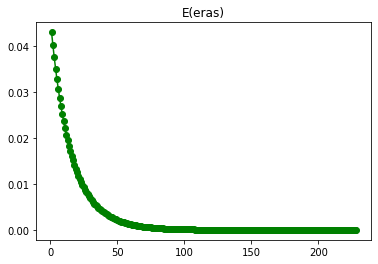

In [3]:
lab(
    30,     # m1 - number neurons for learning
    40,     # m2 - number neurons for test
    0.1,    # a - parametr for etalon function
    0.5,    # b - parametr for etalon function
    0.09,   # c - parametr for etalon function
    0.5,    # d - parametr for etalon function
    0.001,   # step - parametr for etalon function
    8,      # inputs - number neurons
    3,      # hiddens - number neurons
    1,      # outputs - number neurons
    1e-8,   # Ee - desired squared error
    0.001    # alpha - learning rate
)

eras:       24	E:           0.00000000090255426713
after learning:
       0	  0.10035919904106743727	  0.10146118400828520179	  0.00000121437086797394
       1	  0.10040398613483499102	  0.10145520733234726640	  0.00000110506600609914
       2	  0.10044874812760651306	  0.10144923415655951460	  0.00000100097229413015
       3	  0.10049348500819153818	  0.10144326448215347514	  0.00000090208104915941
       4	  0.10053819676540583228	  0.10143729831035971922	  0.00000080838358813847
       5	  0.10058288338807146178	  0.10143133564240797151	  0.00000071987122788871
       6	  0.10062754486501676587	  0.10142537647952673541	  0.00000063653528511158
       7	  0.10067218118507638425	  0.10141942082294433392	  0.00000055836707640102
       8	  0.10071679233709121548	  0.10141346867388767450	  0.00000048535791825213
       9	  0.10076137830990850031	  0.10140752003358316502	  0.00000041749912707327
      10	  0.10080593909238171058	  0.10140157490325606149	  0.00000035478201919595
      11	

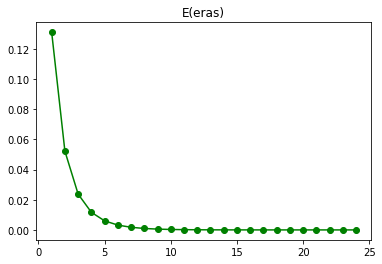

In [5]:
lab(
    30,     # m1 - number neurons for learning
    40,     # m2 - number neurons for test
    0.1,    # a - parametr for etalon function
    0.5,    # b - parametr for etalon function
    0.09,   # c - parametr for etalon function
    0.5,    # d - parametr for etalon function
    0.001,   # step - parametr for etalon function
    8,      # inputs - number neurons
    3,      # hiddens - number neurons
    1,      # outputs - number neurons
    1e-8,   # Ee - desired squared error
    0.01    # alpha - learning rate
)

eras:        3	E:           0.00000000828298593692
after learning:
       0	  0.10035919904106743727	  0.10085604478739229606	  0.00000024685569564111
       1	  0.10040398613483499102	  0.10087161501703156841	  0.00000021867677146442
       2	  0.10044874812760651306	  0.10088717667509772280	  0.00000019221959125525
       3	  0.10049348500819153818	  0.10090272975753489249	  0.00000016748126486510
       4	  0.10053819676540583228	  0.10091827426028898707	  0.00000014445890211665
       5	  0.10058288338807146178	  0.10093381017930880272	  0.00000012314961280814
       6	  0.10062754486501676587	  0.10094933751054457893	  0.00000010355050671579
       7	  0.10067218118507638425	  0.10096485624994910868	  0.00000008565869359825
       8	  0.10071679233709121548	  0.10098036639347729437	  0.00000006947128319981
       9	  0.10076137830990850031	  0.10099586793708614785	  0.00000005498538525391
      10	  0.10080593909238171058	  0.10101136087673490138	  0.00000004219810948685
      11	

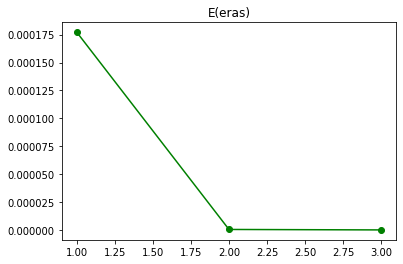

In [9]:
lab(
    30,     # m1 - number neurons for learning
    40,     # m2 - number neurons for test
    0.1,    # a - parametr for etalon function
    0.5,    # b - parametr for etalon function
    0.09,   # c - parametr for etalon function
    0.5,    # d - parametr for etalon function
    0.001,   # step - parametr for etalon function
    8,      # inputs - number neurons
    3,      # hiddens - number neurons
    1,      # outputs - number neurons
    1e-8,   # Ee - desired squared error
    0.1    # alpha - learning rate
)

eras:        1	E:           0.00000000569378290976
after learning:
       0	  0.10035919904106743727	  0.10169973766620629685	  0.00000179704380548918
       1	  0.10040398613483499102	  0.10167834840483566672	  0.00000162399919520128
       2	  0.10044874812760651306	  0.10165697159966116669	  0.00000145980395842380
       3	  0.10049348500819153818	  0.10163560725512124638	  0.00000130444322693177
       4	  0.10053819676540583228	  0.10161425537565169086	  0.00000115790213268425
       5	  0.10058288338807146178	  0.10159291596568528759	  0.00000102016580784123
       6	  0.10062754486501676587	  0.10157158902965099379	  0.00000089121938477994
       7	  0.10067218118507638425	  0.10155027457197554619	  0.00000077104799611604
       8	  0.10071679233709121548	  0.10152897259708229538	  0.00000065963677471918
       9	  0.10076137830990850031	  0.10150768310939081718	  0.00000055697085373034
      10	  0.10080593909238171058	  0.10148640611331830041	  0.00000046303536658232
      11	

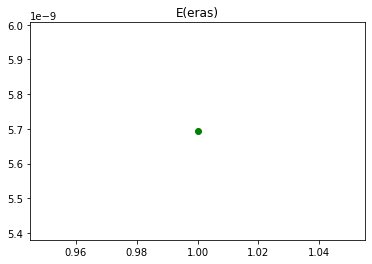

In [153]:
lab(
    30,     # m1 - number neurons for learning
    40,     # m2 - number neurons for test
    0.1,    # a - parametr for etalon function
    0.5,    # b - parametr for etalon function
    0.09,   # c - parametr for etalon function
    0.5,    # d - parametr for etalon function
    0.001,   # step - parametr for etalon function
    8,      # inputs - number neurons
    3,      # hiddens - number neurons
    1,      # outputs - number neurons
    1e-8,   # Ee - desired squared error
    0.5    # alpha - learning rate
)

eras:        2	E:           0.00000000044637262702
after learning:
       0	  0.10035919904106743727	  0.10056787400571876034	  0.00000004354524087223
       1	  0.10040398613483499102	  0.10060148233414412111	  0.00000003900474874155
       2	  0.10044874812760651306	  0.10063507164770912894	  0.00000003471645414343
       3	  0.10049348500819153818	  0.10066864193846214448	  0.00000003067995022182
       4	  0.10053819676540583228	  0.10070219319845685746	  0.00000002689483005346
       5	  0.10058288338807146178	  0.10073572541975184258	  0.00000002336068664819
       6	  0.10062754486501676587	  0.10076923859441166975	  0.00000002007711294984
       7	  0.10067218118507638425	  0.10080273271450557182	  0.00000001704370183630
       8	  0.10071679233709121548	  0.10083620777210833275	  0.00000001426004612033
       9	  0.10076137830990850031	  0.10086966375929984352	  0.00000001172573854989
      10	  0.10080593909238171058	  0.10090310066816599033	  0.00000000944037180888
      11	

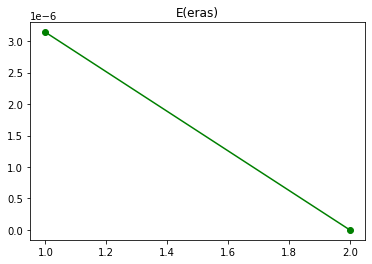

In [60]:
lab(
    30,     # m1 - number neurons for learning
    40,     # m2 - number neurons for test
    0.1,    # a - parametr for etalon function
    0.5,    # b - parametr for etalon function
    0.09,   # c - parametr for etalon function
    0.5,    # d - parametr for etalon function
    0.001,   # step - parametr for etalon function
    8,      # inputs - number neurons
    3,      # hiddens - number neurons
    1,      # outputs - number neurons
    1e-8,   # Ee - desired squared error
    0.8    # alpha - learning rate
)

eras:        3	E:           0.00000000007219339341
after learning:
       0	  0.10035919904106743727	  0.09998044961331953306	  0.00000014345112901936
       1	  0.10040398613483499102	  0.10004297862027089483	  0.00000013032642557175
       2	  0.10044874812760651306	  0.10010546788675844798	  0.00000011784132375671
       3	  0.10049348500819153818	  0.10016791740562736024	  0.00000010599426383939
       4	  0.10053819676540583228	  0.10023032716973079292	  0.00000009478368794111
       5	  0.10058288338807146178	  0.10029269717193001199	  0.00000008420804003849
       6	  0.10062754486501676587	  0.10035502740509394393	  0.00000007426576596279
       7	  0.10067218118507638425	  0.10041731786209928678	  0.00000006495531339893
       8	  0.10071679233709121548	  0.10047956853583017711	  0.00000005627513188474
       9	  0.10076137830990850031	  0.10054177941917874506	  0.00000004822367280974
      10	  0.10080593909238171058	  0.10060395050504522541	  0.00000004079938941419
      11	

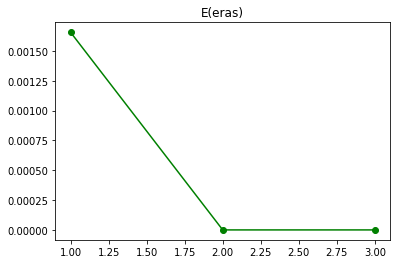

In [25]:
lab(
    30,     # m1 - number neurons for learning
    40,     # m2 - number neurons for test
    0.1,    # a - parametr for etalon function
    0.5,    # b - parametr for etalon function
    0.09,   # c - parametr for etalon function
    0.5,    # d - parametr for etalon function
    0.001,   # step - parametr for etalon function
    8,      # inputs - number neurons
    3,      # hiddens - number neurons
    1,      # outputs - number neurons
    1e-8,   # Ee - desired squared error
    1    # alpha - learning rate
)